# 1-1) Source Code

In [60]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

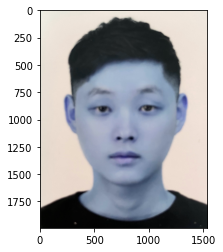

In [64]:
# 불러올 이미지의 경로를 지정합니다
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/profile.png'
# OpenCV 로 이미지를 불러옵니다
img_bgr = cv2.imread(my_image_path)
# img_show 는 출력용 이미지(bgr)입니다
img_show = img_bgr.copy()
plt.imshow(img_show)
plt.show()

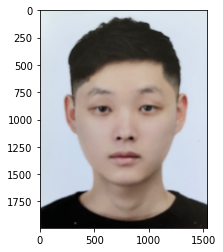

In [65]:
# bgr 이미지를 rgb 이미지로 convert
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [47]:
# 얼굴의 위치를 찾기 위해 hog detector 를 선언
detector_hog = dlib.get_frontal_face_detector()

In [48]:
# detector_hog 로 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(298, 617) (1256, 1576)]]


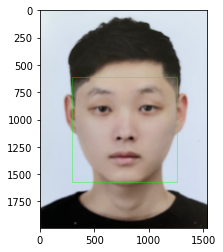

In [49]:
# 찾아낸 얼굴 영역의 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [50]:
# dlib 의 pretrained model 을 선언
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [51]:
# landmarks 의 좌표값을 담을 리스트를 선언
list_landmarks = []

# 찾아낸 얼굴 박스 내에서 face landmark 를 찾아냅니다
for dlib_rect in dlib_rects:
    # points 에 landmark 의 좌표값들을 저장합니다
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 리스트로 저장합니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))
print(list_landmarks[0][0])
print(list_landmarks[0][1])
print(list_landmarks[0][2])

68
(302, 869)
(319, 986)
(344, 1104)


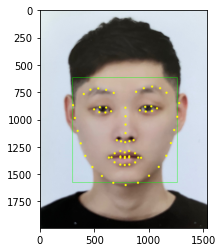

(735, 1347)


In [52]:
# landmark 의 좌표값을 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
print(point)

In [53]:
# 코 끝의 좌표값 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    # 코 끝의 좌표값
    print('(x, y) : ({}, {})'.format(x, y))
    # 찾은 얼굴 사각형의 width 와 height
    print('(w, h) : ({}, {})'.format(w, h))

(782, 1124)
(x, y) : (782, 1124)
(w, h) : (959, 960)


In [54]:
# 고양이 수염 png 파일을 읽어옵니다
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

# 고양이 수염 png 파일의 크기를 조정합니다
img_sticker = cv2.resize(img_sticker, (int(w*1.5), h))
print(img_sticker.shape)

(960, 1438, 3)


In [55]:
# 스티커 이미지의 top-left 좌표 조정
refined_x = x - img_sticker.shape[1] // 2
refined_y = int(y - h // 2.4)
# 스티커 이미지의 최종 top-left 좌표
print('(x, y) : ({}, {})'.format(refined_x, refined_y))

(x, y) : (63, 724)


In [56]:
# 스티커 이미지의 왼쪽이 원본 이미지의 범위를 넘어가는 경우
if refined_x < 0:
    
    # 잘리는 부분을 crop
    img_sticker = img_sticker[:, -refined_x:]
    
    # 스티커 이미지의 top-left 좌표를 0 으로 다시 설정
    refined_x = 0

# 스티커 이미지의 위쪽이 원본 이미지의 범위를 넘어가는 경우
if refined_y < 0:
    
    # 잘리는 부분을 crop
    img_sticker = img_sticker[-refined_y:, :]
    
    # 스티커 이미지의 top-left 좌표를 0 으로 다시 설정
    refined_y = 0

In [57]:
# 이미지에 스티커를 적용
# 스티커 이미지를 붙일 공간
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

# img_sticker 가 0 일 경우, img_sticker 출력
# img_sticker 가 0 이 아닐 경우, sticker_area 출력
img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

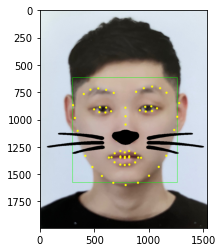

In [58]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

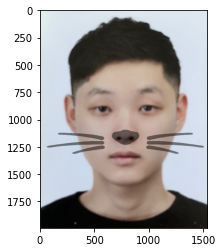

In [63]:
# 원본 이미지에 스티커를 적용
# 스티커 이미지를 붙일 공간
# bounding box 와 landmark 제거한 최종 결과 출력
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

# cv2.addWeighted()
# img_sticker 가 0 일 경우, WeightedImg 를 출력,
# img_sticker 가 0 이 아닐 경우, sticker_area 출력
weightedImg = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.5, 0.0)

img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,weightedImg, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

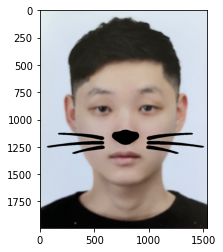

In [66]:
# 원본 이미지에 스티커를 적용
# 스티커 이미지를 붙일 공간
# bounding box 와 landmark 제거한 최종 결과 출력
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0],
                       refined_x : refined_x + img_sticker.shape[1]]

# img_sticker 가 0 일 경우, img_sticker 를 출력,
# img_sticker 가 0 이 아닐 경우, sticker_area 출력
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### Comment
- 증명사진으로 카메라 스티커 앱을 구현해보았다.
- 얼굴 인식 후, 계산된 비율에 의해 성공적으로 코 끝 부분에 스티커가 위치했음을 알 수 있다.
- 또한, openCv의 addWeight() 를 사용하여 스티커의 투명도를 조절하는 코드 또한 실험해보았다.
- np.where 와 addWeight() 를 적절히 사용해 스티커의 검은색 부분에 정확하게 투명도가 적용되었고,
- 스티커의 배경 부분은 원본 사진을 표현하도록 구현되었다.
- 마지막, 투명도를 제거한 이미지에서도 정확한 위치에 스티커가 위치했고, 스티커의 검은색 부분이 투명도없이 잘 적용되었다.

# 1-2) Source Code
**얼굴각도**

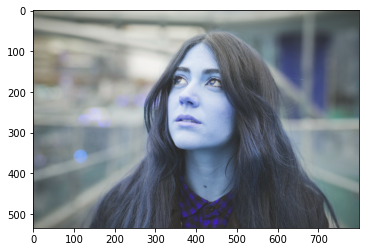

In [18]:
# 불러올 이미지의 경로를 지정합니다
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/profile2.png'
# OpenCV 로 이미지를 불러옵니다
img_bgr = cv2.imread(my_image_path)
# img_show 는 출력용 이미지(bgr)입니다
img_show = img_bgr.copy()
plt.imshow(img_show)
plt.show()

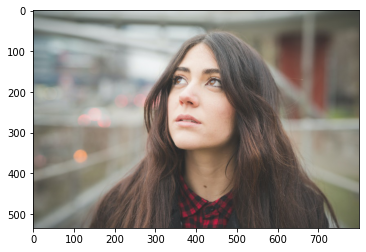

In [19]:
# bgr 이미지를 rgb 이미지로 convert
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(304, 118) (489, 304)]]


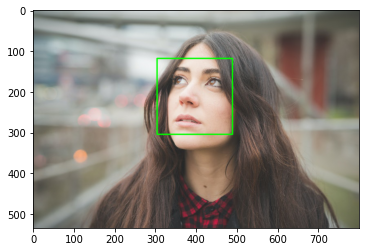

In [20]:
# detector_hog 로 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)

# 찾아낸 얼굴 영역의 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
# landmarks 의 좌표값을 담을 리스트를 선언
list_landmarks = []

# 찾아낸 얼굴 박스 내에서 face landmark 를 찾아냅니다
for dlib_rect in dlib_rects:
    # points 에 landmark 의 좌표값들을 저장합니다
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 리스트로 저장합니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))
print(list_landmarks[0][0])
print(list_landmarks[0][1])
print(list_landmarks[0][2])

68
(342, 184)
(332, 205)
(327, 228)


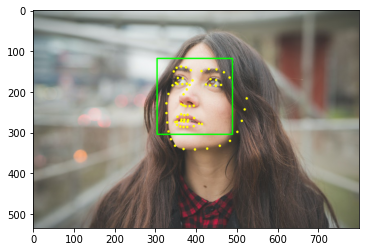

(363, 272)


In [22]:
# landmark 의 좌표값을 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
print(point)

In [23]:
# 코 끝의 좌표값 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    # 코 끝의 좌표값
    print('(x, y) : ({}, {})'.format(x, y))
    # 찾은 얼굴 사각형의 width 와 height
    print('(w, h) : ({}, {})'.format(w, h))

(369, 206)
(x, y) : (369, 206)
(w, h) : (186, 187)


In [24]:
# 고양이 수염 png 파일을 읽어옵니다
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

# 고양이 수염 png 파일의 크기를 조정합니다
img_sticker = cv2.resize(img_sticker, (int(w*1.5), h))
print(img_sticker.shape)

(187, 279, 3)


In [25]:
# 스티커 이미지의 top-left 좌표 조정
refined_x = x - img_sticker.shape[1] // 2
refined_y = int(y - h // 2.4)
# 스티커 이미지의 최종 top-left 좌표
print('(x, y) : ({}, {})'.format(refined_x, refined_y))

(x, y) : (230, 129)


In [26]:
# 원본 이미지에 스티커를 적용
# 스티커 이미지를 붙일 공간
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

# img_sticker 가 0 일 경우, img_sticker 출력
# img_sticker 가 0 이 아닐 경우, sticker_area 출력
img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

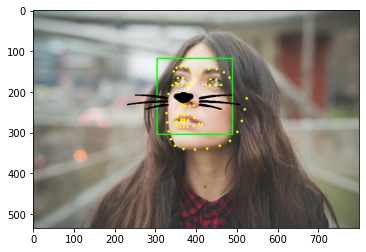

In [27]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

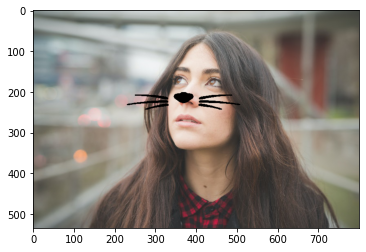

In [28]:
# bounding box 와 landmark 제거한 최종 결과 출력
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0],
                       refined_x : refined_x + img_sticker.shape[1]]

img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### Comment
- 얼굴각도가 다른 사진에서는 1-1 의 예시처럼 정확한 위치에 스티커가 적용되지 않고 조금의 오차가 발생했다.
- 또한, 스티커가 얼굴 각도에 맞게 회전되지 않았으므로, 이보다 큰 각도로 얼굴이 회전된 사진에서는 부자연스러운 결과물이 나올 것이다.
- 그러나, 코 끝의 위치를 성공적으로 찾아내었으며, 해당 위치를 기준으로 비율에 맞게 스티커의 위치가 올바르게 설정되었다.
***

# 1-3) Source Code
**누워있는 사진**

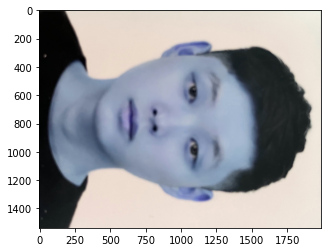

In [29]:
# 불러올 이미지의 경로를 지정합니다
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/profile3.png'
# OpenCV 로 이미지를 불러옵니다
img_bgr = cv2.imread(my_image_path)
# img_show 는 출력용 이미지(bgr)입니다
img_show = img_bgr.copy()
plt.imshow(img_show)
plt.show()

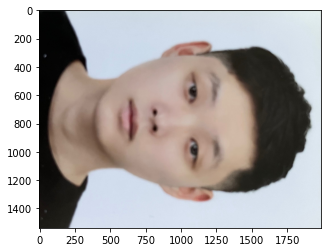

In [30]:
# bgr 이미지를 rgb 이미지로 convert
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[]


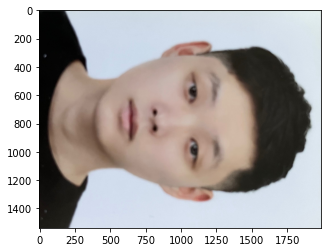

In [31]:
# detector_hog 로 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)

# 찾아낸 얼굴 영역의 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### Comment
- 얼굴이 90 도에 가깝게 회전되어 있는 사진에서 hog detection 모델은 얼굴을 인식해내지 못했음을 알 수 있다.
- hog detector가 사진을 작은 window 로 분리하여 색상의 변화량을 찾아내 SVM 으로 얼굴을 추적하는 과정에서 생긴 문제점일 것이다.
- 얼굴 내의 이목구비의 위치가 회전되었기 때문에 그 위치값이 달라 얼굴로 인식하지 못했을 것이라고 생각한다.
***

# 1-4) Source Code
**여러명의 사진**

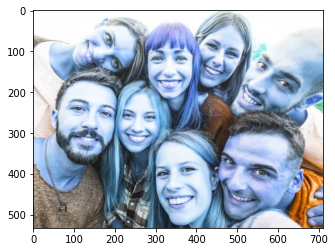

In [32]:
# 불러올 이미지의 경로를 지정합니다
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/profile4.png'
# OpenCV 로 이미지를 불러옵니다
img_bgr = cv2.imread(my_image_path)
# img_show 는 출력용 이미지(bgr)입니다
img_show = img_bgr.copy()
plt.imshow(img_show)
plt.show()

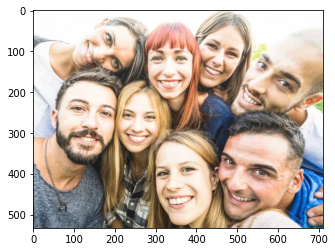

In [33]:
# bgr 이미지를 rgb 이미지로 convert
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(270, 339) (425, 494)], [(196, 225) (325, 354)], [(268, 82) (397, 211)], [(382, 67) (511, 196)], [(64, 184) (218, 339)], [(414, 316) (637, 539)]]


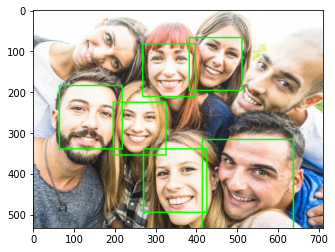

In [34]:
# detector_hog 로 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)

# 찾아낸 얼굴 영역의 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
# landmarks 의 좌표값을 담을 리스트를 선언
list_landmarks = []

# 찾아낸 얼굴 박스 내에서 face landmark 를 찾아냅니다
for dlib_rect in dlib_rects:
    # points 에 landmark 의 좌표값들을 저장합니다
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 리스트로 저장합니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks))
print(len(list_landmarks[0]))
print(list_landmarks[0][0])

6
68
(300, 407)


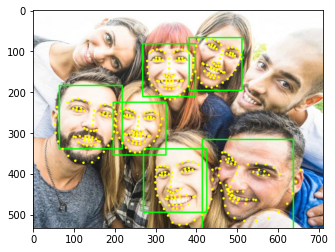

(484, 453)


In [36]:
# landmark 의 좌표값을 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
print(point)

In [37]:
# 각각의 (x, y), (w, h) 를 담을 리스트 생성
xyList = []
whList = []

# 코 끝의 좌표값 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    # 리스트에 각각의 좌표값을 저장
    xyList.append((x, y))
    whList.append((w, h))
    
print(len(xyList))
print(len(whList))

(336, 431)
(254, 293)
(333, 155)
(453, 128)
(146, 281)
(483, 431)
6
6


In [38]:
# 고양이 수염 png 파일을 읽어옵니다
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

# 각각의 img_sticker 를 담을 리스트를 생성합니다
img_sticker_list = []

# 고양이 수염 png 파일의 크기를 조정합니다
for w, h in whList:
    img_sticker = cv2.resize(img_sticker, (int(w*1.5), int(h*0.85)))
    img_sticker_list.append(img_sticker)
    print(img_sticker.shape)

(132, 234, 3)
(110, 195, 3)
(110, 195, 3)
(110, 195, 3)
(132, 232, 3)
(190, 336, 3)


In [39]:
# 각각의 스티커 이미지의 top-left 좌표를 담을 리스트를 생성하여 담습니다
refined_x_list = [xy[0] - img_sticker.shape[1] // 2 for xy, img_sticker in zip(xyList, img_sticker_list)]
refined_y_list = [int(xy[1] - wh[1] // 2.4) for xy, wh in zip(xyList, whList)]

# 스티커 이미지의 최종 top-left 좌표 리스트
print(len(refined_x_list))
print(len(refined_y_list))

6
6


In [40]:
# 원본 이미지에 스티커를 적용
# 스티커 이미지를 붙일 공간
for refined_x, refined_y, img_sticker in zip(refined_x_list, refined_y_list, img_sticker_list):
    sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                            refined_x : refined_x + img_sticker.shape[1]]

    # img_sticker 가 0 일 경우, img_sticker 출력
    # img_sticker 가 0 이 아닐 경우, sticker_area 출력
    img_show[refined_y : refined_y + img_sticker.shape[0],
             refined_x : refined_x + img_sticker.shape[1]] = \
        np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

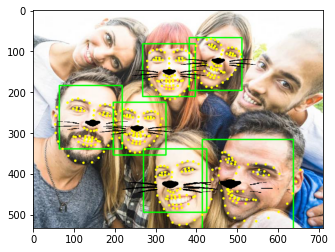

In [41]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
# bounding box 와 landmark 제거한 최종 결과 출력
for refined_x, refined_y, img_sticker in zip(refined_x_list, refined_y_list, img_sticker_list): 
    sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0],
                           refined_x : refined_x + img_sticker.shape[1]]

    img_bgr[refined_y : refined_y + img_sticker.shape[0],
             refined_x : refined_x + img_sticker.shape[1]] = \
        np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

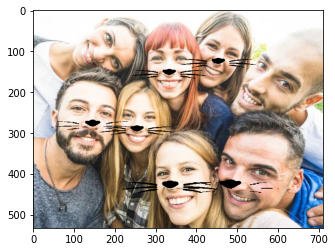

In [43]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### Comment
- 여러 명이 있을 때의 사진을 적용시켜보았다.
- 위에서와 같이 특정 각도 이상의 얼굴은 인식하지 못하는 것을 알 수 있다.
- 그러나 비교적 얼굴의 각도가 반듯한 6명의 인물에 대해서는 정확하게 얼굴을 인식해내었다.
- 얼굴의 각도에 따라 스티커 이미지를 회전시키지 못했지만, for문과 리스트를 주로 활용하여 다수의 얼굴을 인식해내는데는 성공했다.

# 2) Retrospection
***

<h2 style="font-style:italic">2022.01.13 - [E-03]CameraSticker Project</h2>

> 이번 프로젝트에서는 hog detector Model 과 dlib 의 pretrained Model 인 shape_predictor Model 을 활용해 얼굴을 인식하고, 찾아낸 이목구비의 위치값을 기반으로 스티커를 부착하는 프로젝트를 진행하였다. 아래에서는 이번 프로젝트를 진행하면서 어려웠던 점이나 알게된 점, 앞으로 더 학습해야 하는 부분들에 대해 회고해보도록 하겠다

***

**(1)**  **어려웠던 점**
<br>
<br>
- 이번 프로젝트를 진행하면서 가장 어려웠던 점 중 하나는 스티커의 위치를 비율로 조절하는 부분이었다. 입력 데이터의 사진의 픽셀 수가 각각 다를 것이므로, 절대적인 수치값으로 스티커의 위치를 조절할 수는 없었다. 결국 인식해낸 face-box 의 width 와 height 을 활용하여 비율값으로 조정했어야 하는 것이다. 이 또한, face-box 내에서 사람 별로 인중의 길이나 코의 생김새 등 다양한 요소에 의해 영향을 받게 될 것이다. 따라서, 최대한 많은 사진 속 인물들에 대해 정확한 코 끝의 위치값을 찾아낼 수 있는 최적의 비율값을 도출했어야 했다. 이 부분에 거의 모든 시간을 할애했고, 위에서 작성한 소수점 한자리의 나눗셈들이 내가 찾아낸 최적의 비율값이었다. 물론, 이 값은 img_sticker 의 shape 이나 refined_x, refined_y 값에 영향을 주므로 int 형 변환을 해주었다.
<br>
<br>
- 여러명이 포함된 사진에서 다수의 얼굴을 모두 찾아내 스티커를 한 번에 부착하는 코드 작성 부분도 그리 간단하게만 해결되지 않았다. 나의 얕은 개발 역량으로는 각 파트에서 list 를 활용해 모든 값을 저장해놓고, 덕지덕지 for문을 사용해 해당 값을 순서대로 가져다쓰면서 붙여내는 방법밖에는 떠오르지 않았다. 하지만, 결론적으로 이러한 방법들을 시도하면서 list comprehension 의 사용법도 익히고, for 문에서 zip을 활용한 list unpacking 등 비교적 파이써닉(?)한 코드 구현 방법들에 대해 생각해볼 수 있는 좋은 경험이 되었다. 물론, list comprehension 을 사용하기에는 너무 복잡해져 for문으로 해결하는 방법이 오히려 좋아보이기도 했지만 list comprehension 이라는 파이썬의 기가막힌 기능을 경험해보고 습관을 들여보고 싶었다. list unpacking 또한 사용해보니 다른 언어와 비교해 아주 큰 편리함이 있었다. 중복 for문을 사용해야 했던 로직들이 for문 한 번으로 간단하게 구현될 수 있었기 때문이다.
<br>
<br>
- 물론, 다수의 얼굴인식 부분은 리스트와 for문만을 활용해 간단하게 끝난 작업은 아니었다. 코드를 구현하면서 마주친 하나의 오류가 있었는데, 노드에서 언급했었던 스티커 이미지가 원본 이미지의 아래쪽을 넘어갔을 경우였다. 스티커 이미지가 원본 이미지의 오른쪽이나 아래쪽을 넘어갔을 경우에는 refined_x, refined_y 값이 여전히 양수였으므로, 코드 오류의 원인을 직관적으로 찾아내기 어려웠던 것이다. 결국 오류가 발생한 로직에서 실행 과정을 print 로 찍어내본 후, 그때서야 스티커 이미지의 height 가 원본이미지의 height 를 넘어갔음을 알게 되었다. 그래서 원본 이미지의 sticker_area의 크기(원본이미지에서 스티커가 부착될 공간)와 img_sticker의 크기(스티커이미지의 크기)가 서로 달라 np.where 연산이 불가능했고, 해당 부분에서 계속 오류가 발생했던 것이다. 아래는 해당 오류의 사진과 오류의 원인을 찾아내는 과정에서 캡쳐한 사진들이다.<br>
<br>

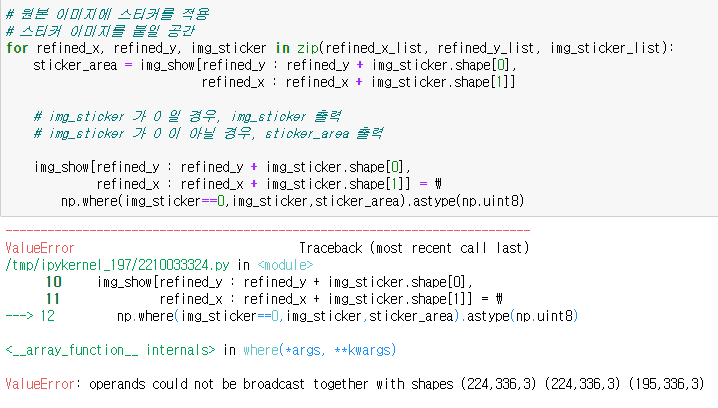
<br>
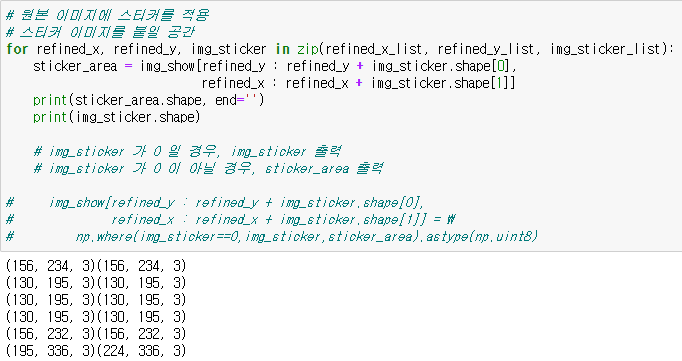
<br>
<br>**결국 위와 같이 반복 횟수마다 sticker_area의 shape 과 img_sticker의 shape 을 찍어보기로 했고, 문제를 발견했다.**
<br>**마지막 반복에서 sticker_area의 shape 과 img_sticker 의 shape 이 서로 일치하지 않아 np.where 연산 불가!**
<br>

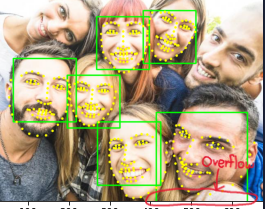
<br>
**위의 빨간색으로 표시한 부분이 원본이미지를 넘어가고 있었다**
<br>

- 이 오류에 대해서는 두 가지 해결방안이 존재했다.
    1. img_sticker 의 height 비율을 195 보다 작게 조정하여 원본 이미지 안에 밀어넣는다.
    1. img_sticker 의 width 와 height 이 원본 이미지의 width, height 을 넘어갔을 경우의 처리 로직을 구현한다.
<br>
<br>
- 물론, 새로운 데이터셋을 위해서 근본적으로 2 번의 해결방안을 사용하는 것이 적절했을 것이다.
- 하지만, for문과 list의 대환장파티 속에 난 지칠대로 지쳐있었고, 가능한 빨리 결과를 확인할 수 있는 1 번 해결방안을 선택했다.
- 변명(물론, 완성된 코드는 아니지만 2 번의 처리 로직을 간단하게 구현해보긴했다.)

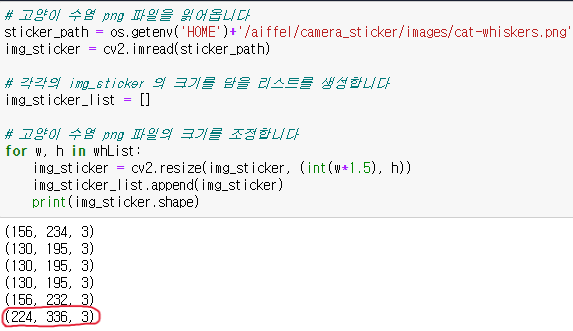
<br>
**위 사진의 빨간색 부분을 195 보다 작게 조정하기로 했다**
<br>
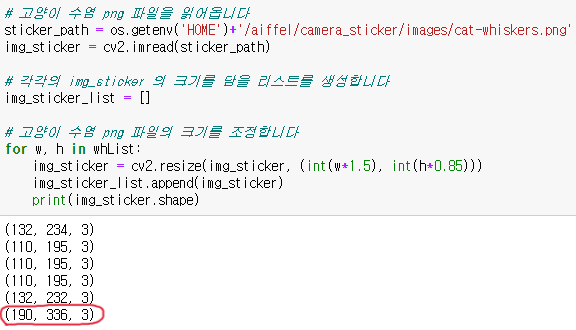
**height 에 곱해지는 값을 변경시켜 195 이하로 스티커 이미지의 크기를 조정하였다**

- 결국 위와 같이 일명 '가라'를 활용하여 너무나도 간단하게 오류를 처리했다..
- 아래는 간단하게 구현해본 2 번의 해결 방안이다.
<br>

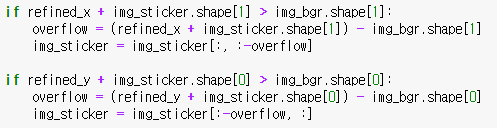
<br>
- 만약, 스티커 이미지의 top-left 좌표값 중 x 값에 스티커 이미지의 width 를 더했을 때, 원본이미지의 width 를 넘는다면,
- 그 차이만큼을 overflow 에 담고, 스티커 이미지에서 overflow 만큼을 잘라낸다.
- y 값이 원본이미지의 height 을 넘어서는 경우에도 마찬가지로 overflow 만큼을 잘라낸다.
- refined_x, refined_y 는 여전히 양수값이므로 초기화해줄 필요는 없다.

- 위와 같이 스티커의 오른쪽과 아래쪽이 원본 이미지를 넘어서는 경우에 대해 처리 로직을 구현해보았다.
- 하지만 실제 코드에 적용해보지는 않았으므로, 동작할지는 모르겠다..
- 나중에 시간이 되면, 적용해보고 결과를 업로드하도록 해야겠다

- 이외에도 프로젝트 진행 중 어려웠던 점은 다양하다.
- hog detector 의 깊은 원리나 SVM 이 벡터값으로 얼굴을 찾아내는 원리 등이 그것이다.
- sliding window 로 어떻게 효과적으로 얼굴을 찾아낼 수 있는지도 아직 어렵다.

**(2)**  **알게된 점**
<br>
<br>
- hog 에 대해 알게 되었다. hog 는 이미지에서 색상의 변화량을 벡터로 나타낸 것이다.
- 따라서, 기존의 색상 차이로 object 를 detection 하는 모델들에 비해 성능이 뛰어났다.
- 또한, 색상이 변화하는 정도에 따라 object 를 detection 하므로 조명이 어둡거나 밝더라도 정확하게 물체를 인식할 수 있다.
<br>
<br>
- 이렇게 찾아낸 hog 값을 기준으로 SVM은 벡터를 구분짓게 된다.
- face detector 모델에서 SVM 은 hog 를 통해 표현된 값들을 다차원 공간의 한 벡터로 보고 얼굴인지 아닌지(Binary Classification)를 분류하게 되는 것이다.
- margin 을 결정하는 support vector 들을 기준으로 SVM 은 이진 분류(얼굴인지 아닌지)를 수행한다.
- SVM 이 분류작업을 수행할 때는 sliding window 를 사용한다. 이미지 전체를 작은 영역인 window 로 나누고 window를 이동해가며 각각 얼굴인지 아닌지를 확인하는 방법이다. 각각의 픽셀별로 확인하며 분류하는 것보다는 훨씬 성능이 뛰어날 것이며, 과적합도 덜 발생하게 될 것 같다. 하지만, 이 sliding window 기법 또한, 픽셀 수가 큰 이미지일수록 시간이 오래걸리는 단점이 발생한다. 이것이 딥러닝이 필요해지는 이유일 것이다.
<br>
<br>
- dlib 가 반환하는 rectangles 객체에 대해서도 알게 되었다. 찾아낸 얼굴 위치 좌표값에 대해서 left(), top(), right(), bottom(), width() 등의 정보를 담고 있으며, 이를 활용해 이미지에 직접 사각형을 그릴 수 있다. 사각형을 그릴 때에는 top-left 의 좌표값, bottom-right 의 좌표값만 있으면 표현이 가능하다.
<br>
<br>
- object keypoint estimation 알고리즘은 말그대로 객체에서 핵심적인 포인트들을 찾아내는 기술이다. face detector 에서는 얼굴 내부의 이목구비 위치값을 찾아내는 역할을 수행하게 된다.
- 이러한 알고리즘은 크게 두가지가 있다. 21개의 점을 찾아내는 기술과 68개의 점을 찾아내는 기술이다. 이번 프로젝트에서는 68개의 점을 찾아내는 dlib의 ibug 300-W 모델을 사용하였다. 이는 사전학습된 모델로서, 따로 훈련시키지 않아도 알고리즘의 사용이 가능하다.
- 그리고 이렇게 찾아낸 얼굴의 이목구비 좌표값을 landmark 라 부른다.
<br>
<br>
- cv2 에서는 원, 타원, 사각형이나 선을 표현하는 메서드들을 제공하고 있었다. 특히 우리는 찾아낸 landmark 들에 대해 원본 이미지에 circle() 을 활용하여 노란색 점으로 나타내었다. circle()의 파라미터는 각각 이미지, 좌표, 반지름, color, 두께를 사용했다. 이미지의 픽셀값이 전부 제각각이었으므로, 픽셀 수가 많은 이미지에서는 반지름값을 키워야만 landmark 를 직접 눈으로 확인할 수 있었다.
<br>
<br>
- 1-1) 에서는 addWeighted() 메서드를 사용하여 부착된 스티커 이미지에 투명도를 적용하여 보았다. addWeighted() 는 두 장의 이미지를 파라미터로 받고, 각각의 이미지의 픽셀값에 가중치를 곱하여 두 이미지의 표현 정도를 조절할 수 있었다. 1-1 의 코드에서는 스티커가 부착될 공간에만 addWeighted()의 적용범위를 설정하였고, np.where 를 활용해 스티커의 배경 부분은 제외한 검은색 부분에만 addWeighted()가 적용되도록 하였다. 하지만, 그렇게 자연스러워보이지는 않아 1-2) 와 1-4) 의 코드에서는 제외하였다.
<br>
<br>
- np.where 도 유용하게 쓰였다. numpy 의 where 메서드는 조건을 파라미터로 하여 해당 조건에 True 인 데이터만 따로 추출할 수 있었다. 또한, 조건에 True, False 인 요소값에 대해 각각의 값을 파라미터로 넣어 인자값을 직접 변경할 수도 있었다. 이번 프로젝트에서는 img_sticker 에서 색이 검정색이었으므로, img_sticker 의 인자값이 0(검정)이라면, img_sticker 의 인자값을 유지하고, 그렇지 않다면, 원본이미지의 인자값을 사용하는 방식으로 자연스러운 스티커의 부착을 구현할 수 있었다.

**(3)** **모호한 점**
<br>
<br>
- 프로젝트가 끝난 후, 부족한 점을 많이 느꼈다.
- 특히, 이런 이미지를 다루는 모델의 경우에 대한 기반 지식이 없다는 것을 다시 한번 느꼈다.
- hog detector 가 이미지의 색상 변화량을 측정하기 때문에 이전의 모델들보다 인식율이 훌륭하다는 것은 이해가 되었지만, 정확히 어떠한 방식으로 이러한 수치를 벡터값으로 표현하는지에 대한 의문점이 남았다. 또한, SVM 이 sliding window 방식으로 hog 의 벡터값에 대해 이진분류를 수행해나가는 과정에 있어서도 정확히 이해가 되지 않았다.
<br>
<br>
- hog detector 의 이미지 피라미드도 굉장히 어려운 개념이었다. 또한, 이미지의 크기를 줄이는 합성곱 신경망의 down sampling 에 대해서는 알고 있었지만, 업샘플링에 대해서는 들어본적이 없어 어려웠다. 지금까지 이해한 내용으로는 동일한 이미지에 대해 업샘플링을 수행하면 이미지의 크기를 키울 수 있게 되고, 이를 쌓은 것이 이미지 피라미드라는 것이다. 이러한 이미지 피라미드를 사용하는 이유는 반복적으로 얼굴을 검출하여 작게 촬영된 얼굴을 더욱 크게 볼 수 있기 때문이라고 한다. 이런 내용이긴 한데,, 머릿속에 딱 떠오르지는 않는 헷갈리는 개념인 것 같다.
<br>
<br>
- 이외에도 이번 프로젝트에서 시험해보지 못한 다양한 특성을 가진 이미지들에 대해 시험해보아야 겠다. 예를 들면, 멀리 있어 이목구비가 뚜렷하게 나오지 않은 사진이나, 강아지나 고양이와 같은 사람이 아닌 동물들의 사진에 대해서는 인식해낼 수 있을지 궁금했다. 또한, 얼굴 각도에 따라 스티커 이미지를 회전시키는 로직에 대해 학습해보아야겠다. 얼굴을 인식하고 얼굴의 각도를 측정한 뒤, 해당 각도를 스티커 이미지에 적용하면, 그에 맞게 어울리는 스티커 이미지를 원본 이미지에 자연스럽게 부착할 수 있을 것이다. 마지막으로, 앞서 간단히 구현해본 스티커 이미지가 원본 이미지의 오른쪽과 아래쪽을 넘어갈 경우에 대한 처리로직을 시험해보아야겠다.